# codesum 세부항목

## codesum 컬럼 세부

In [1]:
import set_math

success import scipy
success import pandas
success import numpy
success import sympy
success import matplotlib.pyplot
Hangul OK in your MAC !!!


In [2]:
sns.set_style('whitegrid')

In [3]:
%matplotlib inline

In [4]:
sample = pd.read_csv('../data/02.sample_v1', index_col = 0)

In [5]:
sample.tail()

,year,month,day,store_nbr,station_nbr,codesum,units,season,isnormal
41595,2014,10,31,41,12,BR,52,fall,Unnormal
41596,2014,10,31,42,14,Normal,64,fall,Normal
41597,2014,10,31,43,11,Normal,48,fall,Normal
41598,2014,10,31,44,12,BR,87,fall,Unnormal
41599,2014,10,31,45,16,Normal,11,fall,Normal


## 필요한 컬럼만 정의

In [6]:
sample = pd.DataFrame(sample, columns=['station_nbr', 'codesum','isnormal', 'units', 'season'])

In [7]:
sample.tail()

,station_nbr,codesum,isnormal,units,season
41595,12,BR,Unnormal,52,fall
41596,14,Normal,Normal,64,fall
41597,11,Normal,Normal,48,fall
41598,12,BR,Unnormal,87,fall
41599,16,Normal,Normal,11,fall


In [8]:
cosum_df = pd.DataFrame(sample, columns = ['codesum','units'])
cosum_df = sample.groupby(['codesum']).size().reset_index(name = 'count')
cosum_df = cosum_df.sort_values(by = ['count'], ascending = False).reset_index(drop = True)
cosum_df

,codesum,count
0,Normal,23140
1,BR,2886
2,RA,2770
3,RA BR,2570
4,BR HZ,747
5,HZ,691
6,SN BR,563
7,TS,496
8,TSRA RA BR,466
9,FG+ BR,313


### 1. RA check

In [9]:
def check_RA(codesum):
    result = ""
    for i in range(len(codesum)):
        if codesum[i] == 'R':
            result += "RA"
        elif codesum[i] == "N":
            result += "Normal"
        else:
            break
    return result


In [10]:
sample['RA_No'] = sample['codesum'].apply(check_RA)

In [11]:
sample.tail()

,station_nbr,codesum,isnormal,units,season,RA_No
41595,12,BR,Unnormal,52,fall,
41596,14,Normal,Normal,64,fall,Normal
41597,11,Normal,Normal,48,fall,Normal
41598,12,BR,Unnormal,87,fall,
41599,16,Normal,Normal,11,fall,Normal


In [12]:
sample_RA = sample[sample['RA_No'].isin(['RA','Normal'])].reset_index(drop = True)

In [13]:
sample_RA.tail()

,station_nbr,codesum,isnormal,units,season,RA_No
30441,8,RA,Unnormal,21,fall,RA
30442,13,Normal,Normal,62,fall,Normal
30443,14,Normal,Normal,64,fall,Normal
30444,11,Normal,Normal,48,fall,Normal
30445,16,Normal,Normal,11,fall,Normal


### 1-1. 전체 데이터의 RA와 Moderate 비교

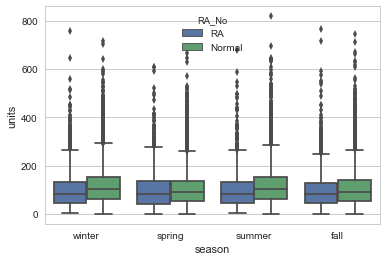

In [14]:
sns.boxplot(x = 'season', y = 'units', data = sample_RA, hue = 'RA_No')

### 1-2. 그중 station_1 만 뽑아서 비교

In [15]:
station_1 = sample[sample['station_nbr'].isin([1])].reset_index(drop = True)
station_1.tail()

,station_nbr,codesum,isnormal,units,season,RA_No
924,1,Normal,Normal,23,fall,Normal
925,1,BR,Unnormal,23,fall,
926,1,RA FG+ FG BR,Unnormal,13,fall,RA
927,1,Normal,Normal,29,fall,Normal
928,1,Normal,Normal,36,fall,Normal


In [16]:
station_RA_1 = sample_RA[sample_RA['station_nbr'].isin([1])].reset_index(drop = True)
station_RA_1.tail()

,station_nbr,codesum,isnormal,units,season,RA_No
741,1,Normal,Normal,81,fall,Normal
742,1,Normal,Normal,23,fall,Normal
743,1,RA FG+ FG BR,Unnormal,13,fall,RA
744,1,Normal,Normal,29,fall,Normal
745,1,Normal,Normal,36,fall,Normal


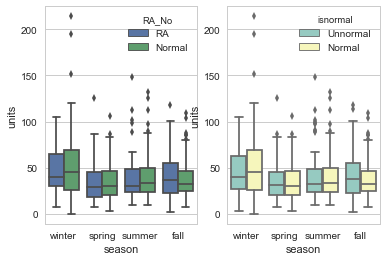

In [17]:
plt.subplot(121)
sns.boxplot(x = 'season', y = 'units', data = station_RA_1, hue = 'RA_No')
plt.subplot(122)
sns.boxplot(x = 'season', y = 'units', data = station_1,hue = 'isnormal', palette = "Set3")

### 1-3. station_10 만 뽑아서 비교

In [18]:
station_10 = sample[sample['station_nbr'].isin([10])].reset_index(drop = True)
station_10.tail()

,station_nbr,codesum,isnormal,units,season,RA_No
2689,10,TS RA BR HZ,Unnormal,32,fall,
2690,10,TS RA BR HZ,Unnormal,47,fall,
2691,10,Normal,Normal,41,fall,Normal
2692,10,Normal,Normal,18,fall,Normal
2693,10,Normal,Normal,12,fall,Normal


In [19]:
station_RA_10 = sample_RA[sample_RA['station_nbr'].isin([10])].reset_index(drop = True)
station_RA_10.tail()

,station_nbr,codesum,isnormal,units,season,RA_No
1900,10,Normal,Normal,19,fall,Normal
1901,10,Normal,Normal,35,fall,Normal
1902,10,Normal,Normal,41,fall,Normal
1903,10,Normal,Normal,18,fall,Normal
1904,10,Normal,Normal,12,fall,Normal


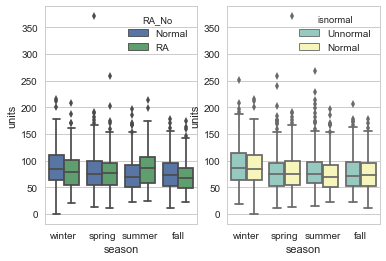

In [20]:
plt.subplot(121)
sns.boxplot(x = 'season', y = 'units', data = station_RA_10, hue = 'RA_No')
plt.subplot(122)
sns.boxplot(x = 'season', y = 'units', data = station_10,hue = 'isnormal', palette = "Set3")

# SN (snow)  check

In [21]:
def check_SN(codesum):
    result = ""
    for i in range(len(codesum)):
        if codesum[i] == 'S':
            result += "SN"
            break
        elif codesum[i] == "N":
            result += "Normal"
            break
        else:
            break
    return result

In [22]:
sample['SN_No'] = sample['codesum'].apply(check_SN)

In [23]:
sample['SN_No'].loc[47]

'SN'

In [24]:
sample_SN = sample[sample['SN_No'].isin(['SN','Normal'])].reset_index(drop = True)

In [25]:
sample_SN.tail()

,station_nbr,codesum,isnormal,units,season,RA_No,SN_No
24546,14,Normal,Normal,110,fall,Normal,Normal
24547,13,Normal,Normal,62,fall,Normal,Normal
24548,14,Normal,Normal,64,fall,Normal,Normal
24549,11,Normal,Normal,48,fall,Normal,Normal
24550,16,Normal,Normal,11,fall,Normal,Normal


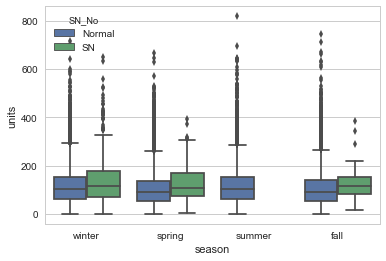

In [26]:
sns.boxplot(x = 'season', y = 'units', data = sample_SN, hue = 'SN_No')

# TS (Thunder Storm) check

In [27]:
def check_TS(codesum):
    result = ""
    for i in range(len(codesum)):
        if codesum[i] == 'T':
            result += "TS"
            break
        elif codesum[i] == "N":
            result += "Normal"
            break
        else:
            break
    return result

In [28]:
sample['TS_No'] = sample['codesum'].apply(check_TS)

In [29]:
sample_TS = sample[sample['TS_No'].isin(['TS','Normal'])].reset_index(drop = True)

In [30]:
sample_TS.tail()

,station_nbr,codesum,isnormal,units,season,RA_No,SN_No,TS_No
26519,14,Normal,Normal,110,fall,Normal,Normal,Normal
26520,13,Normal,Normal,62,fall,Normal,Normal,Normal
26521,14,Normal,Normal,64,fall,Normal,Normal,Normal
26522,11,Normal,Normal,48,fall,Normal,Normal,Normal
26523,16,Normal,Normal,11,fall,Normal,Normal,Normal


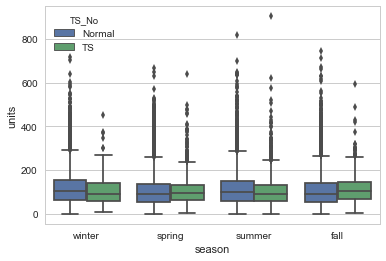

In [31]:
sns.boxplot(x = 'season', y = 'units', data = sample_TS, hue = 'TS_No')

In [32]:
def check_TSRA(codesum):

    if codesum == 'TSRA RA BR':
        return "TSRA RA BR"

    elif codesum == "Normal":
        return "Normal"

    else:
        return ""

In [33]:
sample.tail()

,station_nbr,codesum,isnormal,units,season,RA_No,SN_No,TS_No
41595,12,BR,Unnormal,52,fall,,,
41596,14,Normal,Normal,64,fall,Normal,Normal,Normal
41597,11,Normal,Normal,48,fall,Normal,Normal,Normal
41598,12,BR,Unnormal,87,fall,,,
41599,16,Normal,Normal,11,fall,Normal,Normal,Normal


In [37]:
sample['TSRA_No'] = sample['codesum'].apply(check_TSRA)
sample_TSRA = sample[sample['TSRA_No'].isin(['TSRA RA BR','Normal'])].reset_index(drop = True)
sample_TSRA.tail()

,station_nbr,codesum,isnormal,units,season,RA_No,SN_No,TS_No,TSRA_No
23601,14,Normal,Normal,110,fall,Normal,Normal,Normal,Normal
23602,13,Normal,Normal,62,fall,Normal,Normal,Normal,Normal
23603,14,Normal,Normal,64,fall,Normal,Normal,Normal,Normal
23604,11,Normal,Normal,48,fall,Normal,Normal,Normal,Normal
23605,16,Normal,Normal,11,fall,Normal,Normal,Normal,Normal


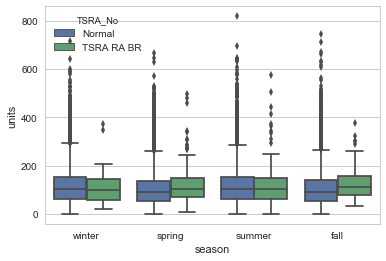

In [45]:
sns.boxplot(x = 'season', y = 'units', data = sample_TSRA, hue = 'TSRA_No')

In [43]:
sample_TSRA['TSRA_No'].loc[250:300]

250        Normal
251        Normal
252        Normal
253        Normal
254        Normal
255        Normal
256        Normal
257        Normal
258        Normal
259        Normal
260        Normal
261        Normal
262        Normal
263        Normal
264        Normal
265        Normal
266        Normal
267        Normal
268        Normal
269        Normal
270        Normal
271        Normal
272        Normal
273        Normal
274        Normal
275        Normal
276        Normal
277        Normal
278        Normal
279        Normal
280        Normal
281        Normal
282        Normal
283        Normal
284        Normal
285        Normal
286        Normal
287        Normal
288        Normal
289        Normal
290        Normal
291        Normal
292    TSRA RA BR
293        Normal
294        Normal
295        Normal
296        Normal
297        Normal
298        Normal
299        Normal
300        Normal
Name: TSRA_No, dtype: object

In [50]:
train = pd.read_csv('../data/train.csv', index_col = 0)
train['item_nbr'].max()

111